In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
plot.prepare_for_plots()

/usr/local/lib/python3.8/dist-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


Using cuda device


<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

# Zero:  distilling from full-training teacher

In [3]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)
    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'zero')
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.full_student_learning_rate)
    
    for epoch in range(consts.full_student_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/zero_full_{i}.pt')

Model 10
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.566939 

Epoch 2
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.566174 

Epoch 3
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.565518 

Epoch 4
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.564861 

Epoch 5
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.564117 

Epoch 6
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.563490 

Epoch 7
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.562896 

Epoch 8
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.562121 

Epoch 9
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.561661 

Epoch 10
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.560887 

Epoch 11
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.560435 

Epoch 12
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.559884 

Epoch 13
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.559331 

Epoch 14
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.558875 

Epoch 15
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.558417 

Epoch 16
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.557954 

Epoch 17
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.557833 

Epoch 18
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.557468 

Epoch 19
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.557104 

Epoch 20
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.556767 

Epoch 21
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.556528 

Epoch 22
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.556316 

Epoch 23
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.555986 

Epoch 24
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.555876 

Epoch 25
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.555576 

Epoch 26
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.555289 

Epoch 27
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.555092 

Epoch 28
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.554852 

Epoch 29
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.554887 

Epoch 30
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.554610 

Epoch 31
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.554471 

Epoch 32
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.554247 

Epoch 33
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.554069 

Epoch 34
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.553949 

Epoch 35
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.553800 

Epoch 36
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.553878 

Epoch 37
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.553778 

Epoch 38
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.553475 

Epoch 39
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.553304 

Epoch 40
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.553261 

Epoch 41
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.553182 

Epoch 42
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.553092 

Epoch 43
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.553149 

Epoch 44
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.553140 

Epoch 45
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.553077 

Epoch 46
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.552840 

Epoch 47
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.552902 

Epoch 48
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.552687 

Epoch 49
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.552577 

Epoch 50
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.552685 



FSGM Accuracy [0.8097, 0.7829, 0.7497, 0.712, 0.6659, 0.6146, 0.5636, 0.5112, 0.46, 0.408]


Noise Accuracy [0.8097, 0.8001, 0.7701, 0.7359, 0.6772, 0.6432, 0.5663, 0.5234, 0.4721, 0.4385]


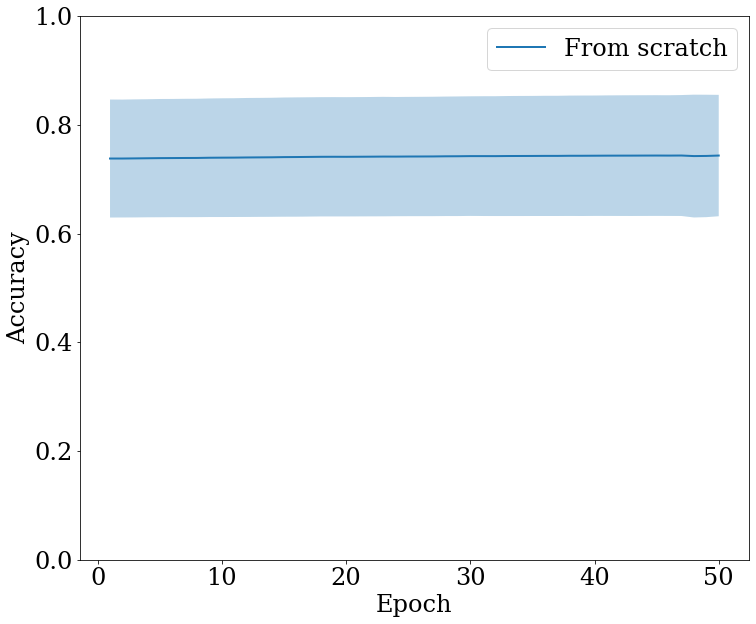

In [4]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.full_student_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

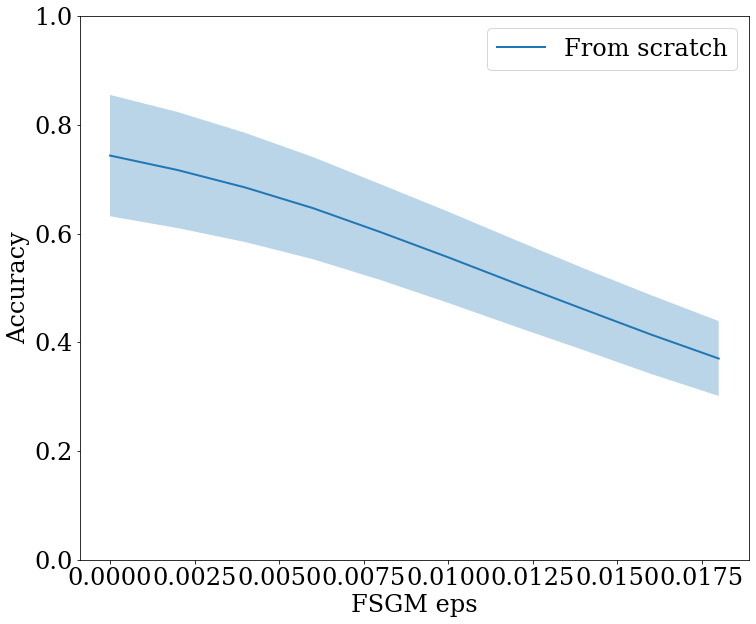

In [5]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

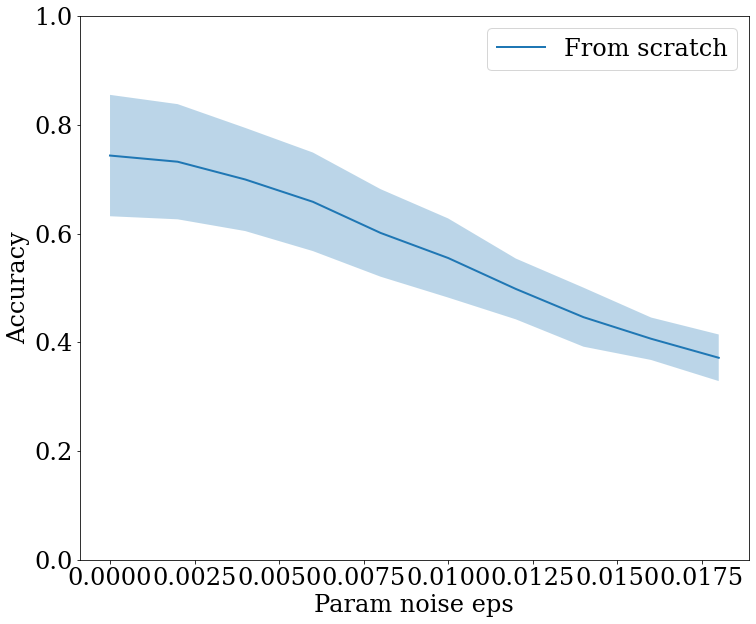

In [7]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [8]:
with open(pipeline.get_path()+'/history_full_zero.json', 'w') as out:
    out.write(json.dumps(history))

# Zero: distilling from 5-classes trainer

In [3]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'zero')
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/zero_5_{i}.pt')

Model 10
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Validation accuracy: 76.7%, Validation loss: 0.684563 

Epoch 2
-------------------------------


Validation accuracy: 83.2%, Validation loss: 0.482789 

Epoch 3
-------------------------------


Validation accuracy: 84.9%, Validation loss: 0.428991 

Epoch 4
-------------------------------


Validation accuracy: 85.6%, Validation loss: 0.407555 

Epoch 5
-------------------------------


Validation accuracy: 85.9%, Validation loss: 0.394733 

Epoch 6
-------------------------------


Validation accuracy: 86.2%, Validation loss: 0.388190 

Epoch 7
-------------------------------


Validation accuracy: 86.5%, Validation loss: 0.382890 

Epoch 8
-------------------------------


Validation accuracy: 86.5%, Validation loss: 0.379912 

Epoch 9
-------------------------------


Validation accuracy: 86.7%, Validation loss: 0.376292 

Epoch 10
-------------------------------


Validation accuracy: 86.8%, Validation loss: 0.371872 

Epoch 11
-------------------------------


Validation accuracy: 86.9%, Validation loss: 0.369440 

Epoch 12
-------------------------------


Validation accuracy: 87.1%, Validation loss: 0.367903 

Epoch 13
-------------------------------


Validation accuracy: 87.2%, Validation loss: 0.367305 

Epoch 14
-------------------------------


Validation accuracy: 87.2%, Validation loss: 0.365853 

Epoch 15
-------------------------------


Validation accuracy: 87.3%, Validation loss: 0.366062 

Epoch 16
-------------------------------


Validation accuracy: 87.3%, Validation loss: 0.366282 

Epoch 17
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.365830 

Epoch 18
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.365574 

Epoch 19
-------------------------------


Validation accuracy: 87.4%, Validation loss: 0.367688 

Epoch 20
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.368574 

Epoch 21
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.370606 

Epoch 22
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.373304 

Epoch 23
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.378305 

Epoch 24
-------------------------------


Validation accuracy: 87.7%, Validation loss: 0.379881 

Epoch 25
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.381452 

Epoch 26
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.383729 

Epoch 27
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.386271 

Epoch 28
-------------------------------


Validation accuracy: 87.4%, Validation loss: 0.389297 

Epoch 29
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.391908 

Epoch 30
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.395473 



FSGM Accuracy [0.8752, 0.8368, 0.7943, 0.7478, 0.7051, 0.6611, 0.615, 0.5728, 0.531, 0.4919]


Noise Accuracy [0.8752, 0.8743, 0.8654, 0.8616, 0.8514, 0.8415, 0.8185, 0.7962, 0.7611, 0.7338]


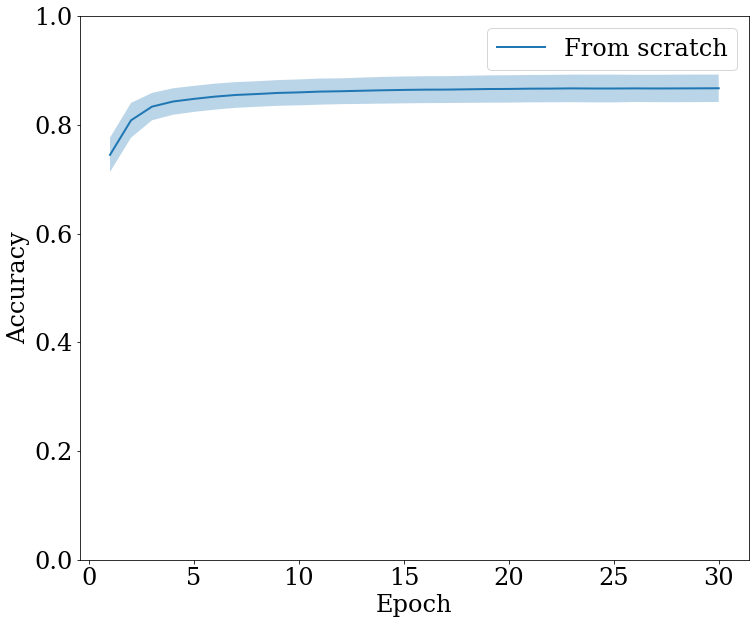

In [4]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

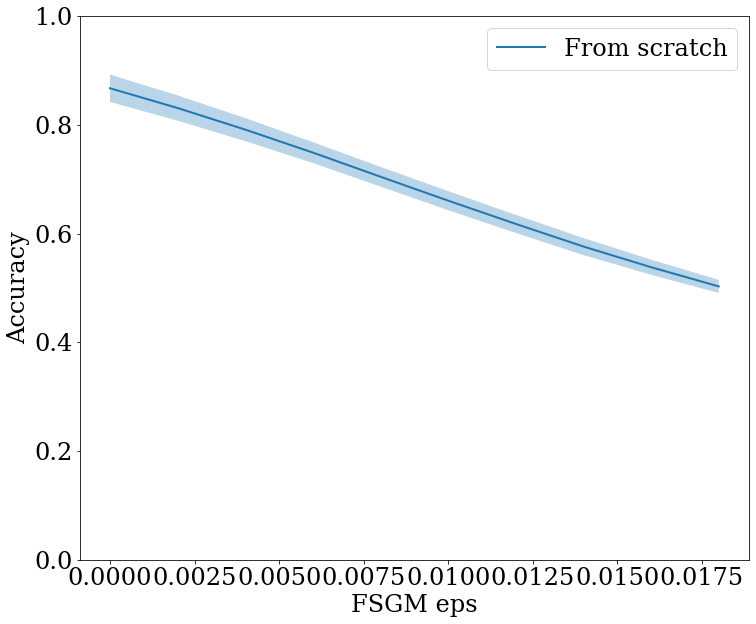

In [5]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

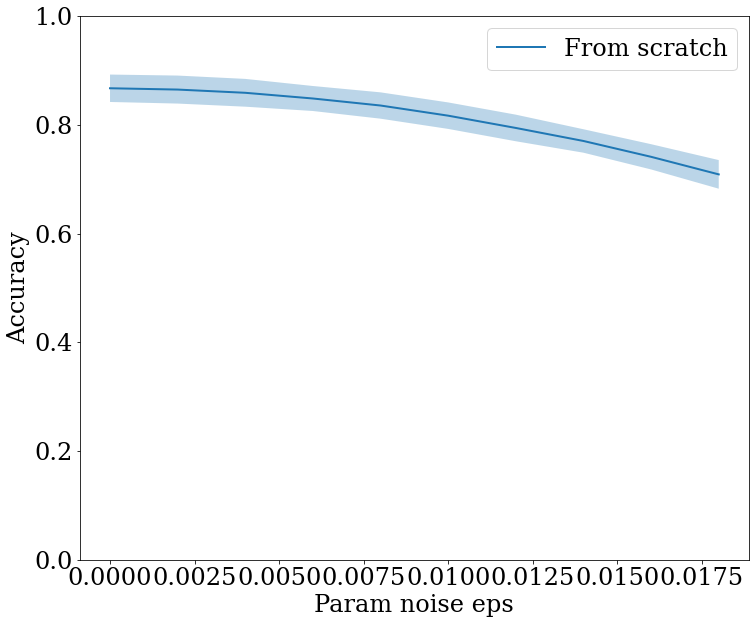

In [6]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [7]:
with open(pipeline.get_path()+'/history_5_zero.json', 'w') as out:
    out.write(json.dumps(history))